# Ejemplo de Clustering

Este notebook es un ejemplo de uso de clustering usando una serie de funciones utilidades que se han definido para la práctica 2.

## Carga del fichero

En este caso voy a clasificar datos distintos al problema.

In [1]:
import seaborn as sns

In [2]:
df_all = sns.load_dataset('penguins')

In [45]:
type(df_all)

pandas.core.frame.DataFrame

In [3]:
df_all.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Filtro de nuestro caso de uso

En nuestro caso aplicamos el caso de uso de una determinada isla. Vosotros/as para el datasets tendréis que usar un par de datasets, fijando los atributos deseados. 

In [4]:
df_all.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [5]:
df = df_all[df_all.island == 'Dream']
df = df[df.sex == 'Female']

Voy a aplicar clustering. Para ello voy a utilizar únicamente los valores numéricos.

In [7]:
atributos = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

Cargo las funciones de utilidad

In [9]:
from pract2_utils import *

In [11]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
30,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
32,Adelie,Dream,39.5,17.8,188.0,3300.0,Female
34,Adelie,Dream,36.4,17.0,195.0,3325.0,Female
37,Adelie,Dream,42.2,18.5,180.0,3550.0,Female
38,Adelie,Dream,37.6,19.3,181.0,3300.0,Female
...,...,...,...,...,...,...,...
211,Chinstrap,Dream,45.6,19.4,194.0,3525.0,Female
213,Chinstrap,Dream,46.8,16.5,189.0,3650.0,Female
214,Chinstrap,Dream,45.7,17.0,195.0,3650.0,Female
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female


Esta función nos permite convertir los atributos deseados en una matrix.

In [47]:
data = to_matrix(df, atributos)

Vamos a ver las primeras filas

In [13]:
data[:5]

array([[  39.5,   16.7,  178. , 3250. ],
       [  39.5,   17.8,  188. , 3300. ],
       [  36.4,   17. ,  195. , 3325. ],
       [  42.2,   18.5,  180. , 3550. ],
       [  37.6,   19.3,  181. , 3300. ]])

## Normalizar los datos

Para aplicar los métodos de clustering es normal normalizar los datos, vamos a usar nuestra propia función (para luego poder desnormalizar en la gráfica).

In [46]:
data_norm = norm(data)

In [17]:
data[:5]

array([[  39.5,   16.7,  178. , 3250. ],
       [  39.5,   17.8,  188. , 3300. ],
       [  36.4,   17. ,  195. , 3325. ],
       [  42.2,   18.5,  180. , 3550. ],
       [  37.6,   19.3,  181. , 3300. ]])

In [18]:
data_norm[:5]

array([[0.28571429, 0.30769231, 0.        , 0.37931034],
       [0.28571429, 0.58974359, 0.41666667, 0.4137931 ],
       [0.16602317, 0.38461538, 0.70833333, 0.43103448],
       [0.38996139, 0.76923077, 0.08333333, 0.5862069 ],
       [0.21235521, 0.97435897, 0.125     , 0.4137931 ]])

In [19]:
data_norm

array([[0.28571429, 0.30769231, 0.        , 0.37931034],
       [0.28571429, 0.58974359, 0.41666667, 0.4137931 ],
       [0.16602317, 0.38461538, 0.70833333, 0.43103448],
       [0.38996139, 0.76923077, 0.08333333, 0.5862069 ],
       [0.21235521, 0.97435897, 0.125     , 0.4137931 ],
       [0.16988417, 0.64102564, 0.16666667, 0.31034483],
       [0.15057915, 0.76923077, 0.33333333, 0.27586207],
       [0.18918919, 0.35897436, 0.29166667, 0.20689655],
       [0.15057915, 0.61538462, 0.5       , 0.51724138],
       [0.2007722 , 0.58974359, 0.54166667, 0.44827586],
       [0.18532819, 0.79487179, 0.45833333, 0.55172414],
       [0.26254826, 0.84615385, 0.5       , 0.62068966],
       [0.13899614, 0.64102564, 1.        , 0.5862069 ],
       [0.07335907, 0.41025641, 0.29166667, 0.48275862],
       [0.15830116, 0.46153846, 0.375     , 0.4137931 ],
       [0.23166023, 0.79487179, 0.5       , 0.68965517],
       [0.03861004, 0.15384615, 0.        , 0.13793103],
       [0.18146718, 0.76923077,

## Aplico el k-means

Voy a aplicar un único k-means, vosotros tendríais que aplicar un estudio de parámetros, y además otro algoritmo más.

In [20]:
from sklearn.cluster import KMeans

In [21]:
results = KMeans(n_clusters=3, random_state=0).fit(data_norm)

In [22]:
results.labels_

array([2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1], dtype=int32)

En los atributos labels_ tengo en un vector las etiquetas de cada fila, y 

In [23]:
labels = results.labels_

In [24]:
centroids = results.cluster_centers_

## Obtengo la medida

In [26]:
silhouette, calinski = measures_silhoutte_calinski(data_norm, labels)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.237120
calinsky: 23.640255


## Visualizo los centroides

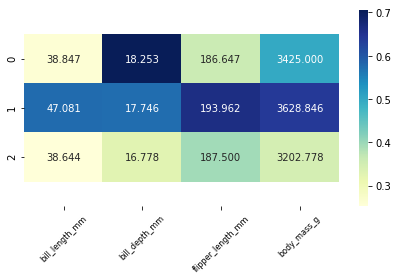

In [27]:
visualize_centroids(centroids, data, atributos)

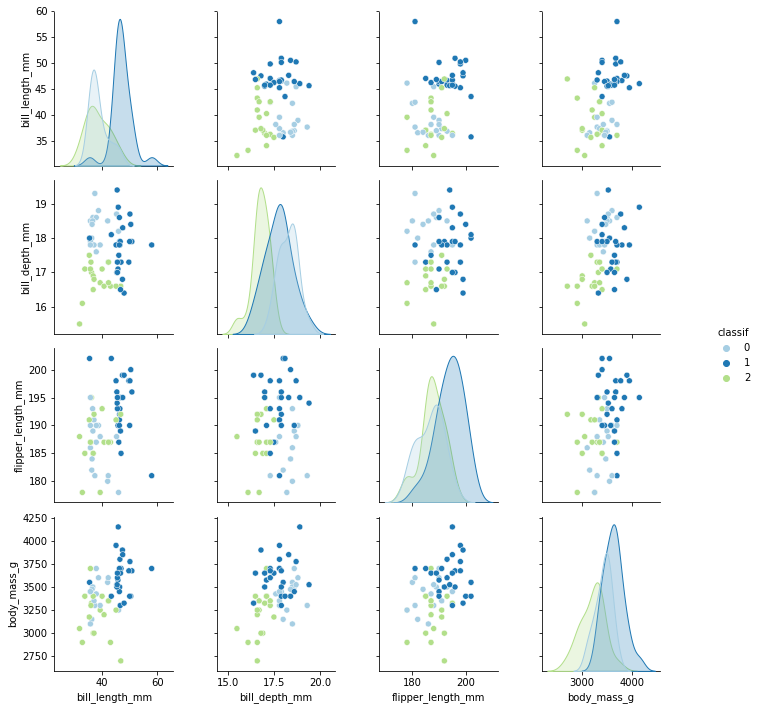

In [30]:
pairplot(df, atributos, labels)

## Viendo el balanceo de los distintos clustering

Vamos a ver cómo se distribuyen

In [31]:
from collections import Counter

In [32]:
Counter(labels)

Counter({0: 17, 1: 26, 2: 18})

De un cluster hay bastante más que de los otros dos, que están mucho más parejos.

# Calculo de Centroides _a mano_

¿Y si no tuviese los centroides?

Vamos a calcularlos a mano.

Primeros creamos un dataframe a partir de los datos normalizados

In [33]:
df_data = pd.DataFrame(data_norm)

Ahora le asignamos sus nombres de atributos 

In [34]:
df_data.columns = atributos

In [35]:
df_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.285714,0.307692,0.000000,0.379310
1,0.285714,0.589744,0.416667,0.413793
2,0.166023,0.384615,0.708333,0.431034
3,0.389961,0.769231,0.083333,0.586207
4,0.212355,0.974359,0.125000,0.413793


Le añadimos el cluster como otro atributo

In [36]:
df_data['cluster'] = labels

In [37]:
df_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,0.285714,0.307692,0.000000,0.379310,2
1,0.285714,0.589744,0.416667,0.413793,0
2,0.166023,0.384615,0.708333,0.431034,2
3,0.389961,0.769231,0.083333,0.586207,0
4,0.212355,0.974359,0.125000,0.413793,0


In [38]:
df_centroides = df_data.groupby('cluster').mean()

In [39]:
df_centroides

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,0.260504,0.705882,0.360294,0.500000
1,0.578408,0.575937,0.665064,0.640584
2,0.252681,0.327635,0.395833,0.346743


In [40]:
centroids

array([[0.2605042 , 0.70588235, 0.36029412, 0.5       ],
       [0.57840808, 0.57593688, 0.6650641 , 0.64058355],
       [0.25268125, 0.32763533, 0.39583333, 0.3467433 ]])

Si los queremos de igual forma podemos hacer:

In [41]:
centroides = df_centroides.values

In [42]:
centroides

array([[0.2605042 , 0.70588235, 0.36029412, 0.5       ],
       [0.57840808, 0.57593688, 0.6650641 , 0.64058355],
       [0.25268125, 0.32763533, 0.39583333, 0.3467433 ]])

In [43]:
import numpy as np

Vemos que son equivalentes (son números reales, por eso comparamos que la diferencia sea pequeña en vez de comparar con igualdad)

In [44]:
np.all(np.abs(centroids-centroides) < 1e-15)

True